<a href="https://colab.research.google.com/github/Isi2000/EZFRACTALS/blob/main/CPP_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python fractals

The purpose of this notebook is to provide a tool to better understand the cpp code to render fractals.

Therefore the code will not be optimized, it will follow the cpp implementation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def num_iter(z0, c, max_iter, thresh=4):
    """
    Function that given a point on the complex plane and a given constant c,
    calculates the orbit given by the recursive formula z = z**2 + c of that point.
    """
    zn = z0  # Initialize the current complex value to the given point z0
    it = 0  # Initialize the iteration counter to 0
    # Continue iterating while the magnitude squared of zn is less than thresh
    # and the iteration counter is less than max_iter.
    while abs(zn) ** 2 < thresh and it < max_iter:
        # Calculate the next value of zn using the recursive formula: z = z**2 + c
        zn = zn ** 2 + c
        it += 1  # Increment the iteration counter
    return it  # Return the number of iterations taken for the point to escape the threshold or reach max_iter.

In [3]:
import os
class Fractals:
    def __init__(self, dim):
        # board to represent the mandelbrot and julia fractals
        self.dim = dim
        self.board = np.ones(dim * dim, dtype=float)

    def get_dimension(self):
        return self.dim

    def get_board(self):
        return self.board

    def mandel_gen(self, scaling_factor=1.0, zoom_real=-2.00, zoom_imaginary=-1.13):
        """
        Generates the Mandelbrot set and can zoom in an arbitrary point (re, im).
        scaling_factor: how much it scales.
        zoom_real: real coordinate in the Argand Gauss plane for zoom.
        zoom_imaginary: imag coordinate in the Argand Gauss plane zoom.
        The numeric constants are chosen in a way so that the image is centered.
        """
        z_real_bound = 2.48 * scaling_factor / (self.dim - 1)
        z_im_bound = 2.26 * scaling_factor / (self.dim - 1)

        for x in range(self.dim):
            for y in range(self.dim):
                real = x * z_real_bound  + zoom_real
                im = y * z_im_bound + zoom_imaginary
                number_iterations = num_iter(0, complex(real, im), 300)
                self.board[y * self.dim + x] = 1.0 - number_iterations / 300.0

    def julia_gen(self, c):
        """
        Generates the Julia set as a function of a complex variable 'c'.
        """
        max_iterations = 100
        z_real_bound = 4.0 / (self.dim - 1)
        z_im_bound = 4.0 / (self.dim - 1)

        for x in range(self.dim):
            for y in range(self.dim):
                real = x * z_real_bound - 2.0
                im = y * z_im_bound - 2.0
                number_iterations = num_iter(complex(real, im), c, max_iterations)
                self.board[y * self.dim + x] = 1.0 - number_iterations / float(max_iterations)

    def showb(self):
      """
      function that shows the board, there isn't a countepart in cpp code
      """
      plt.imshow(np.reshape(self.board, (self.dim, self.dim)))
      plt.show()

    @staticmethod
    def smkdir(name):
        """
        Smart mkdir, checks if there is a directory and if there is not, it creates it.
        """
        if not os.path.exists(name) or not os.path.isdir(name):
            os.makedirs(name)
            print("Directory created!!! :)")
        else:
            print("...")  # ... = dir already existing
        return name

    def save_to_file_j(self, c, p):
        """
        Saves the board in a directory created with smkdir.
        c: constant associated with the Julia set.
        p: directory name.
        """
        dir_name = self.smkdir(p) + '/'
        path = "./"
        filename = path + dir_name + str(c.real) + "_" + str(c.imag) + ".ppm"
        with open(filename, 'w') as outfile:
            outfile.write("P3\n")
            outfile.write(str(self.dim) + " " + str(self.dim) + "\n")
            outfile.write("255\n")

            for i in range(self.dim):
                for j in range(self.dim):
                    pixel_value = int(self.board[i * self.dim + j] * 255)
                    outfile.write(f"{pixel_value} {pixel_value} {pixel_value} ")
                outfile.write("\n")

    def save_to_file_m(self, scaling_factor, p):
        """
        Saves the board in a directory created with smkdir.
        scaling_factor: scaling coefficient to zoom.
        p: directory name.
        """
        dir_name = self.smkdir(p) + '/'
        path = "./"
        filename = path + dir_name + "output_scaling_" + str(scaling_factor) + ".ppm"
        with open(filename, 'w') as outfile:
            outfile.write("P3\n")
            outfile.write(str(self.dim) + " " + str(self.dim) + "\n")
            outfile.write("255\n")

            for i in range(self.dim):
                for j in range(self.dim):
                    pixel_value = int(self.board[i * self.dim + j] * 255)
                    outfile.write(f"{pixel_value} {pixel_value} {pixel_value} ")
                outfile.write("\n")



In [4]:
def generate_scaled_outputs(dim, start_scaling_factor, end_scaling_factor, scaling_factor_step, dir,
                            zoom_real=-0.7004, zoom_imaginary=-0.1):
    """
    Generates images of the Mandelbrot set with different scaling factors.
    dim: resolution of the board.
    start_scaling_factor: initial value of the scaling factor.
    end_scaling_factor: last value of the scaling factor.
    scaling_factor_step: step size for scaling factor.
    dir: location for the generated files.
    zoom_real: real coordinate in the Argand Gauss plane for zoom (default is -0.7004).
    zoom_imaginary: imag coordinate in the Argand Gauss plane for zoom (default is -0.1).
    """
    scaling_factor = start_scaling_factor
    while scaling_factor >= end_scaling_factor:
        board = Fractals(dim)
        board.mandel_gen(scaling_factor, zoom_real, zoom_imaginary)
        board.save_to_file_m(scaling_factor, dir)
        scaling_factor -= scaling_factor_step

def generate_julia_set(dim, num_points, step, dir):
    """
    Generates images of Julia sets with different complex constants.
    dim: resolution of the board.
    num_points: number of images.
    step: step size for the real and imaginary parts of the complex constant.
    dir: location for the generated files.
    """
    for i in range(num_points):
        real_c = 0.0 + i * step
        imag_c = 0.0 - i * step
        c = complex(real_c, imag_c)
        board = Fractals(dim)
        board.julia_gen(c)
        board.save_to_file_j(c, dir)

In [5]:
def main():
    dim_ = 400
    c = complex(0.3, -0.45)
    img = "README_IMG"

    # Generate a single image of the Julia set
    j = Fractals(dim_)
    j.julia_gen(c)
    j.save_to_file_j(c, img)

    # Generate a single image of the Mandelbrot set
    m = Fractals(dim_)
    scaling_factor = 0.9
    m.mandel_gen(scaling_factor, -2, -1.13)
    m.save_to_file_m(scaling_factor, img)

    dim = 100
    num_points = 20
    step = 0.05
    dir_j = "julia_set"

    # Generate images for creating a gif of the Julia set
    generate_julia_set(dim, num_points, step, dir_j)

    start_scaling_factor = 1.0
    end_scaling_factor = 0.5
    step_ = 0.05
    dir_m = "mandelbrot_zoom"

    # Generate images of the Mandelbrot set with different scaling factors
    generate_scaled_outputs(dim, start_scaling_factor, end_scaling_factor, step_, dir_m)

main() #this resembles the cpp main, of course it is kinda silly to do it like this in python


Directory created!!! :)
...
Directory created!!! :)
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
Directory created!!! :)
...
...
...
...
...
...
...
...
...


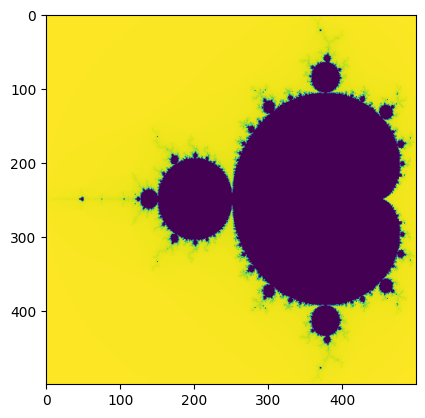

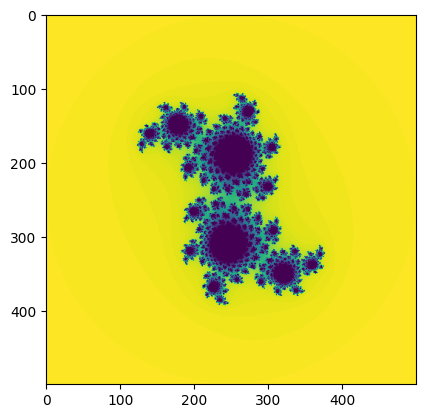

In [7]:
b = Fractals(500)
b.mandel_gen(1, -2, -1.13)
b.showb()
c = complex(0.3, -0.45)
b.julia_gen(c)
b.showb()